MAPPING WATER EXTENTS IN LAKE BARINGO FROM 2016 TO 2023 USING MNDWI WITH BOUNDARY DELINEATION AND CUSTOM COLORING

1. Loading required libraries 

In [1]:
#LOAD REQUIRED LIBRARIES
import rarfile # Import the rarfile library to work with .rar compressed files 
import os # to interact with the operating system
import rasterio # for reading and writing geospatial raster data
import matplotlib.pyplot as plt # for creating plots
import matplotlib.image as mpimg # for reading and displaying images
import numpy as np # for numerical operations and array manipulations
from rasterio.plot import show # for displaying raster data
from matplotlib.colors import ListedColormap # for creating custom colormaps
from matplotlib.patches import Patch # for creating custom legend entries
from skimage import measure # for image processing and measurement functions
import streamlit as st  # for app building
from ipywidgets import Dropdown, Output, VBox # for interactive elements
from ipyleaflet import Map, Marker, FullScreenControl, TileLayer # Import mapping components

2. Checking working directory contents. 

In [2]:
# Subdirectory where the images are located
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# List all files in the subdirectory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Display the list of image files
image_files

['Baringo2017-12-31.tif',
 'Baringo2022-06-30.tif',
 'Baringo2021-12-31.tif',
 'Baringo2020-06-30.tif',
 'Baringo2016-06-30.tif',
 'Baringo2018-12-31.tif',
 'Baringo2017-06-30.tif',
 'Baringo2023-06-30.tif',
 'Baringo2018-06-30.tif',
 'Baringo2020-12-31.tif',
 'Baringo2022-12-31.tif',
 'Baringo2023-12-31.tif',
 'Baringo2021-06-30.tif',
 'Baringo2016-12-31.tif',
 'Baringo2019-12-31.tif',
 'Baringo2019-06-30.tif']

3. Displaying Images in working directory. 

Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-12-31.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2022-06-30.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-12-31.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-06-30.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-06-30.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-12-31.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-06-30.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2023-06-30.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-06-30.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-12-31.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2022-12-31.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2023-12-31.tif
Displaying: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-06-30.tif
Displaying: /home/eoafric

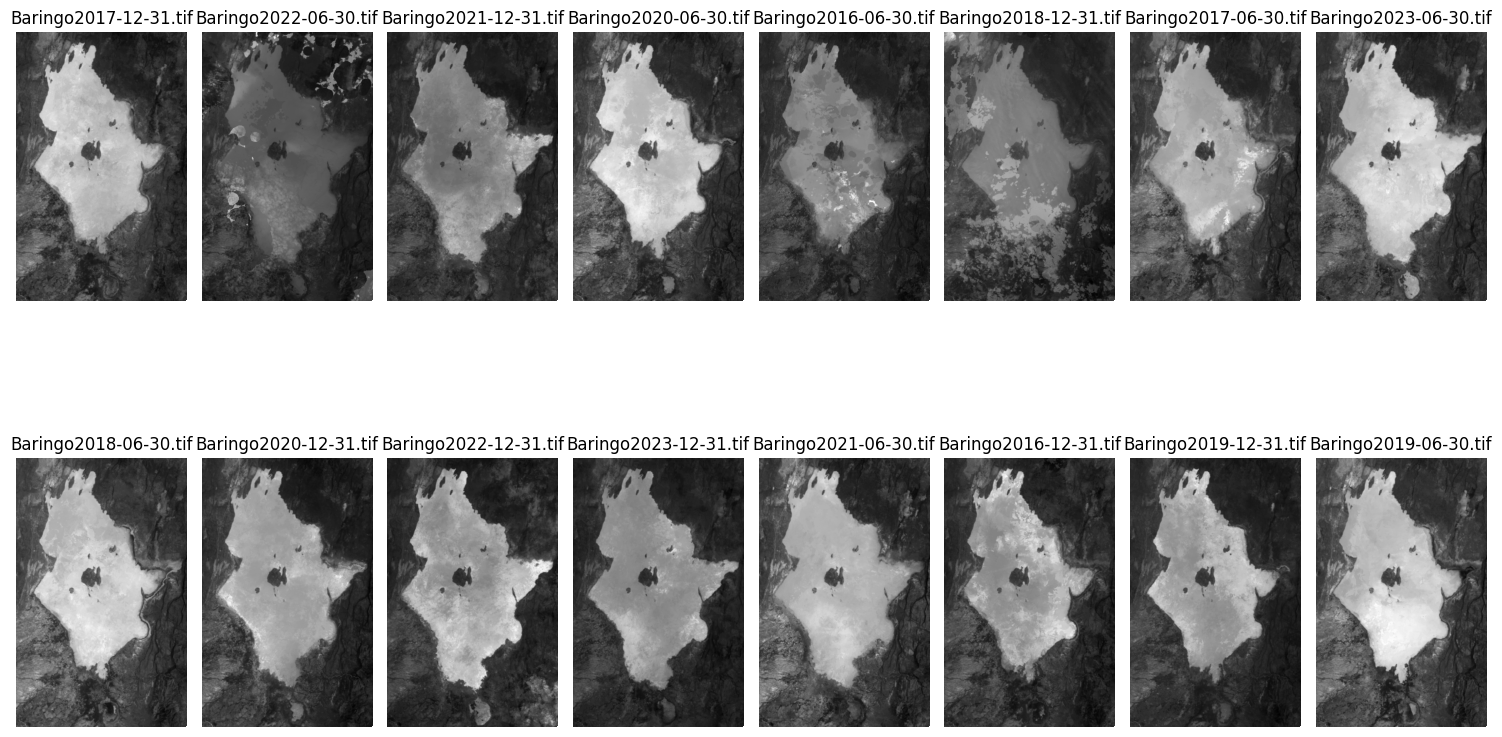

In [3]:
# Check if there are image files
if not image_files:
    print("No image files found in the subdirectory.")
else:
    plt.figure(figsize=(15, 10))  # Set the figure size
    num_images = len(image_files)
    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(image_dir, image_file)
        print(f"Displaying: {image_path}")
        try:
            with rasterio.open(image_path) as src:
                # Read the image data
                img = src.read(1)  # Reading the first band
                plt.subplot(2, (num_images + 1) // 2, idx + 1)  # Arrange in 2 rows
                plt.imshow(img, cmap='gray')
                plt.axis('off')
                plt.title(image_file)
        except Exception as e:
            print(f"Error displaying {image_path}: {e}")
    plt.tight_layout()
    plt.show()

4. Calculating MNDWI using MNDWI= Green-SWIR/Green+SWIR

Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-06-30.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-12-31.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-06-30.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-12-31.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-06-30.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-12-31.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-06-30.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-12-31.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-06-30.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-12-31.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-06-30.tif
Calculating MNDWI for: /home/eoafrica/Lake_Baringo/KU 

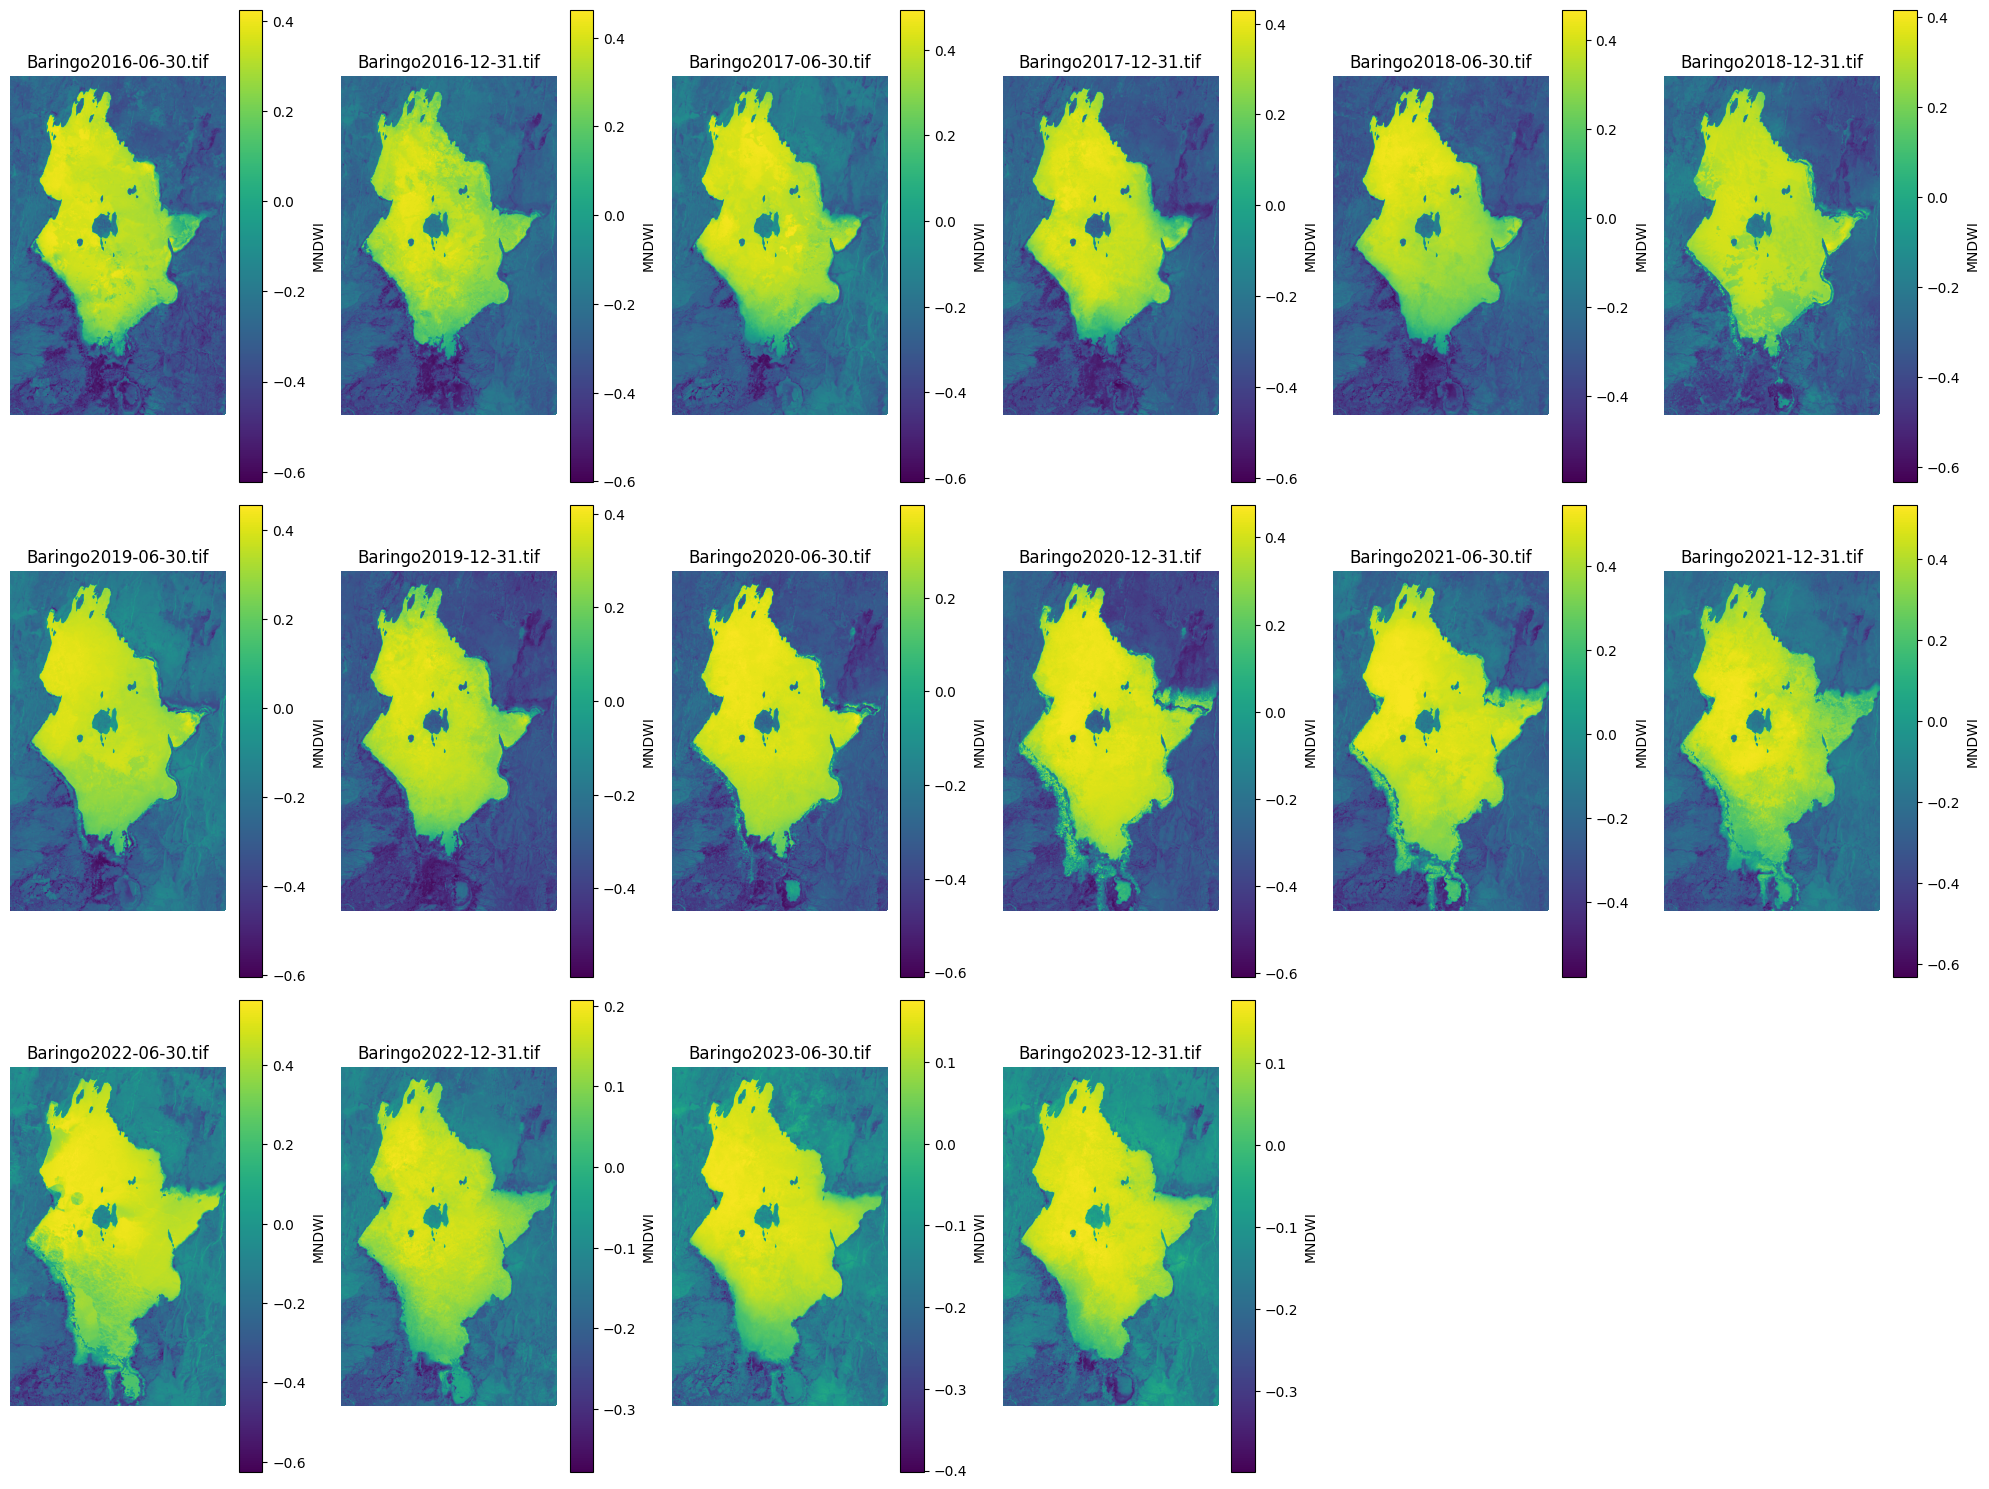

In [4]:

# Directory path
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# List all files in the subdirectory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Function to extract the date from the filename
def extract_date(filename):
    base_name = os.path.splitext(filename)[0]  # Remove the file extension
    date_part = base_name.split('Baringo')[1]  # Extract the date part
    return date_part

# Sort the image files by date
image_files.sort(key=extract_date)

# Check if there are image files
if not image_files:
    print("No image files found in the subdirectory.")
else:
    # Loop through the images and calculate MNDWI
    plt.figure(figsize=(20, 15))  # Set the figure size
    num_images = len(image_files)
    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(image_dir, image_file)
        print(f"Calculating MNDWI for: {image_path}")
        try:
            with rasterio.open(image_path) as src:
                # Read the Green and SWIR bands
                green = src.read(2)  # Assuming Green is the 2nd band
                swir = src.read(6)   # Assuming SWIR is the 6th band

                # Calculate MNDWI
                mndwi = (green.astype(float) - swir.astype(float)) / (green + swir + 1e-10)

                # Display the MNDWI
                plt.subplot(3, (num_images + 2) // 3, idx + 1)  # Arrange in 3 rows
                plt.imshow(mndwi, cmap='viridis')
                plt.colorbar(label='MNDWI')
                plt.grid(True)  # Add grid to the plot
                plt.axis('off')
                plt.title(image_file)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    plt.tight_layout()
    plt.show()

5. Plotting a line graph for temporal analysis of the lake. 

Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2022-06-30.tif
Processing: /home/eoafric

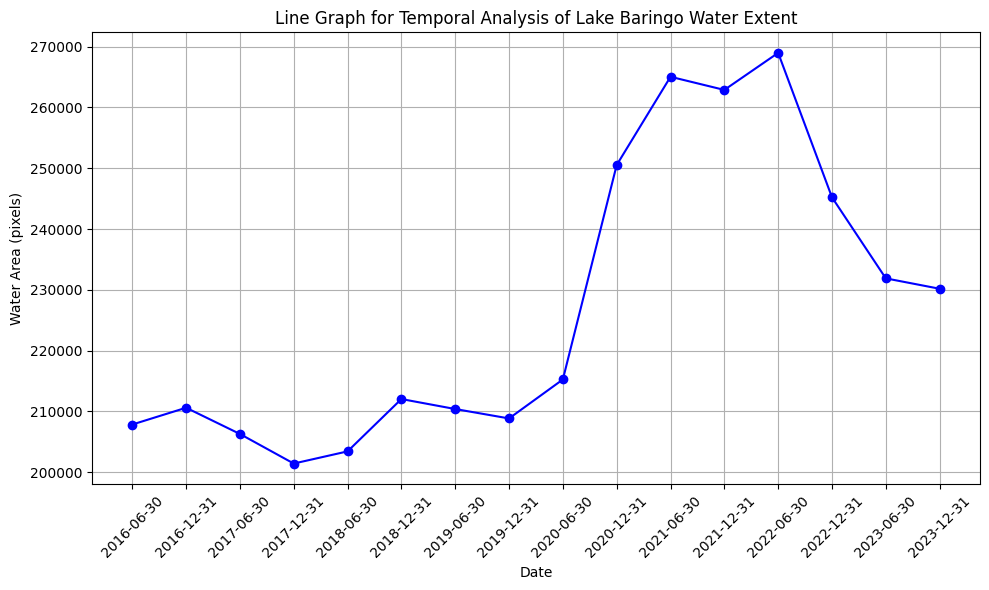

In [5]:
# Subdirectory where the images are located
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# List all files in the subdirectory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Function to extract the date from the filename
def extract_date(filename):
    base_name = os.path.splitext(filename)[0]  # Remove the file extension
    date_part = base_name.split('Baringo')[1]  # Extract the date part
    return date_part

# Sort the image files by date
image_files.sort(key=extract_date)

# Check if there are image files
if not image_files:
    print("No image files found in the subdirectory.")
else:
    dates = []
    water_areas = []

    # Loop through the images and calculate MNDWI
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        date = extract_date(image_file)
        dates.append(date)
        print(f"Processing: {image_path}")

        try:
            with rasterio.open(image_path) as src:
                # Read the Green and SWIR bands
                green = src.read(2)  # Assuming Green is the 2nd band
                swir = src.read(6)   # Assuming SWIR is the 6th band

                # Calculate MNDWI
                mndwi = (green.astype(float) - swir.astype(float)) / (green + swir + 1e-10)

                # Threshold MNDWI to classify water and non-water areas
                water_mask = mndwi > 0

                # Calculate total water area (number of water pixels)
                water_area = np.sum(water_mask)

                # Append the water area for the current image
                water_areas.append(water_area)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            dates.pop()
    
    # Plot the changes in water extent over time
    plt.figure(figsize=(10, 6))
    plt.plot(dates, water_areas, marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Water Area (pixels)')
    plt.title('Line Graph for Temporal Analysis of Lake Baringo Water Extent')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


6. Plotting a bar graph for temporal analysis of the lake. 

Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2022-06-30.tif
Processing: /home/eoafric

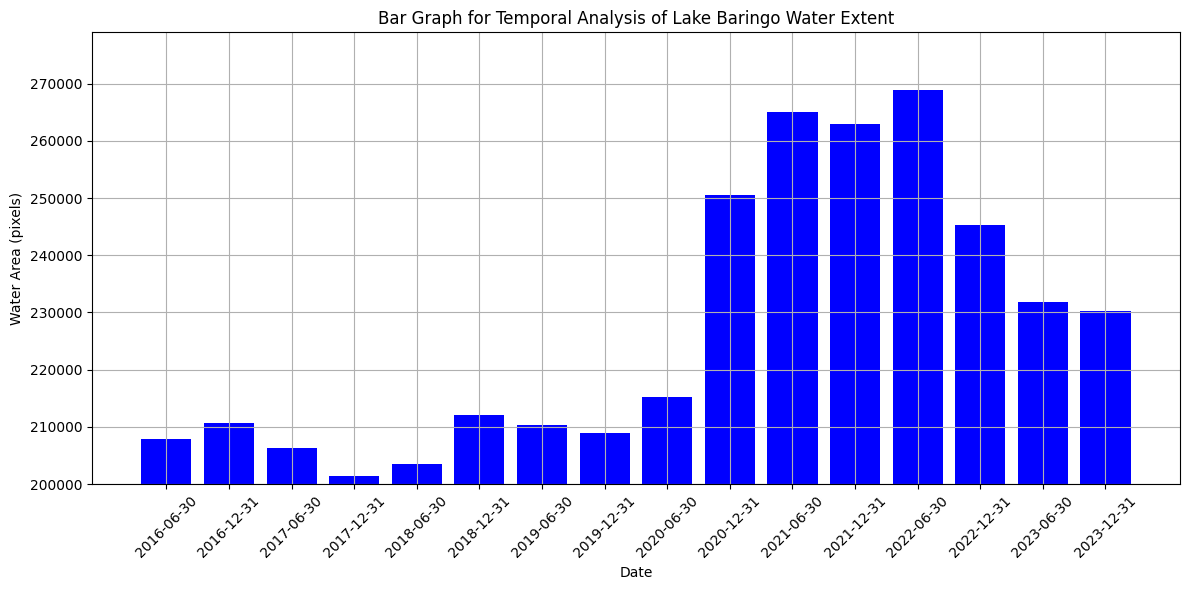

In [6]:
# Subdirectory where the images are located
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# List all files in the subdirectory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Function to extract the date from the filename
def extract_date(filename):
    base_name = os.path.splitext(filename)[0]  # Remove the file extension
    date_part = base_name.split('Baringo')[1]  # Extract the date part
    return date_part

# Sort the image files by date
image_files.sort(key=extract_date)

# Check if there are image files
if not image_files:
    print("No image files found in the subdirectory.")
else:
    dates = []
    water_areas = []

    # Loop through the images and calculate MNDWI
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        date = extract_date(image_file)
        dates.append(date)
        print(f"Processing: {image_path}")

        try:
            with rasterio.open(image_path) as src:
                # Read the Green and SWIR bands
                green = src.read(2)  # Assuming Green is the 2nd band
                swir = src.read(6)   # Assuming SWIR is the 6th band

                # Calculate MNDWI
                mndwi = (green.astype(float) - swir.astype(float)) / (green + swir + 1e-10)

                # Threshold MNDWI to classify water and non-water areas
                water_mask = mndwi > 0

                # Calculate total water area (number of water pixels)
                water_area = np.sum(water_mask)

                # Append the water area for the current image
                water_areas.append(water_area)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            dates.pop()

    # Plot the changes in water extent over time using a bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(dates, water_areas, color='b')
    plt.xlabel('Date')
    plt.ylabel('Water Area (pixels)')
    plt.title('Bar Graph for Temporal Analysis of Lake Baringo Water Extent')
    plt.ylim(200000, max(water_areas) + 10000)  # Set the starting value of the y-axis to 200000
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


7. Actual vs Predicted water extent Values in Lake Baringo
 - predicted values are in relation of the  rainfall data from Kenya Open Data portal.  

Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2016-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2017-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2018-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2019-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2020-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-06-30.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2021-12-31.tif
Processing: /home/eoafrica/Lake_Baringo/KU Hackathon/Baringo2022-06-30.tif
Processing: /home/eoafric

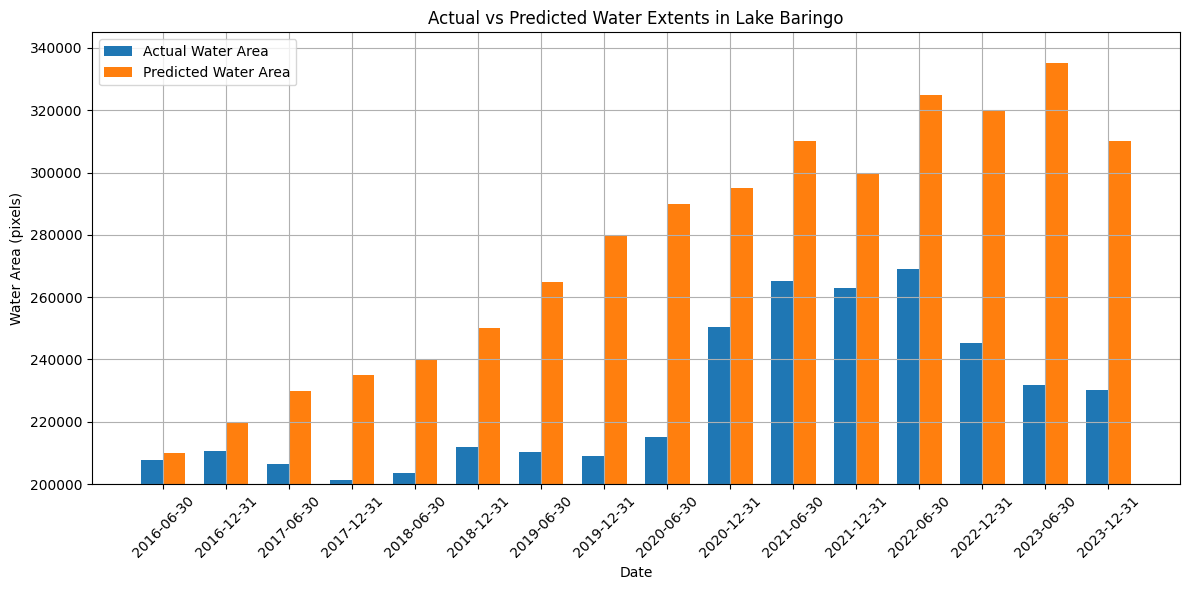

In [7]:
# Subdirectory where the images are located
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# List all files in the subdirectory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Function to extract the date from the filename
def extract_date(filename):
    base_name = os.path.splitext(filename)[0]  # Remove the file extension
    date_part = base_name.split('Baringo')[1]  # Extract the date part
    return date_part

# Sort the image files by date
image_files.sort(key=extract_date)

# Predicted water values
predicted_water_areas = [210000, 220000, 230000, 235000, 240000, 250000, 265000, 280000, 290000, 295000, 310000, 300000, 325000, 320000, 335000, 310000]


# Check if there are image files
if not image_files:
    print("No image files found in the subdirectory.")
else:
    dates = []
    water_areas = []

    # Loop through the images and calculate MNDWI
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        date = extract_date(image_file)
        dates.append(date)
        print(f"Processing: {image_path}")

        try:
            with rasterio.open(image_path) as src:
                # Read the Green and SWIR bands
                green = src.read(2)  # Assuming Green is the 2nd band
                swir = src.read(6)   # Assuming SWIR is the 6th band

                # Calculate MNDWI
                mndwi = (green.astype(float) - swir.astype(float)) / (green + swir + 1e-10)

                # Threshold MNDWI to classify water and non-water areas
                water_mask = mndwi > 0

                # Calculate total water area (number of water pixels)
                water_area = np.sum(water_mask)

                # Append the water area for the current image
                water_areas.append(water_area)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            dates.pop()

    # Plot the changes in water extent over time using a bar graph
    plt.figure(figsize=(12, 6))
    
    bar_width = 0.35  # Width of the bars
    index = np.arange(len(dates))  # The label locations
    
    plt.bar(index, water_areas, bar_width, label='Actual Water Area')
    plt.bar(index + bar_width, predicted_water_areas[:len(water_areas)], bar_width, label='Predicted Water Area')

    plt.xlabel('Date')
    plt.ylabel('Water Area (pixels)')
    plt.title('Actual vs Predicted Water Extents in Lake Baringo')
    plt.ylim(200000, max(max(water_areas), max(predicted_water_areas[:len(water_areas)])) + 10000)  # Set the starting value of the y-axis to 200000
    plt.grid(True)
    plt.xticks(index + bar_width / 2, dates, rotation=45)
    plt.tight_layout()
    plt.legend()

    plt.show()


8. Calculating the highest and lowest water areas.

In [8]:
# Define your image directory
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# List all files in the subdirectory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Function to extract the date from the filename
def extract_date(filename):
    base_name = os.path.splitext(filename)[0]  # Remove the file extension
    date_part = base_name.split('Baringo')[1]  # Extract the date part
    return date_part

# Sort the image files by date
image_files.sort(key=extract_date)

# Check if there are image files
if not image_files:
    print("No image files found in the subdirectory.")
else:
    dates = []
    water_areas = []

    # Loop through the images and calculate MNDWI
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        date = extract_date(image_file)
        dates.append(date)

        try:
            with rasterio.open(image_path) as src:
                # Read the Green and SWIR bands
                green = src.read(2)  # Assuming Green is the 2nd band
                swir = src.read(6)   # Assuming SWIR is the 6th band

                # Calculate MNDWI
                mndwi = (green.astype(float) - swir.astype(float)) / (green + swir + 1e-10)

                # Threshold MNDWI to classify water and non-water areas
                water_mask = mndwi > 0

                # Calculate total water area (number of water pixels)
                water_area = np.sum(water_mask)

                # Append the water area for the current image
                water_areas.append(water_area)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            dates.pop()

    # Print the dates corresponding to the highest and lowest water areas
    if water_areas:
        max_index = np.argmax(water_areas)
        min_index = np.argmin(water_areas)

        max_date = dates[max_index]
        min_date = dates[min_index]

        max_water_area = water_areas[max_index]
        min_water_area = water_areas[min_index]

        print(f"Highest water area: {max_water_area} pixels on {max_date}")
        print(f"Lowest water area: {min_water_area} pixels on {min_date}")
    else:
        print("No valid water areas calculated.")


Highest water area: 268956 pixels on 2022-06-30
Lowest water area: 201444 pixels on 2017-12-31


9. Plotting the highest and lowest water levels.

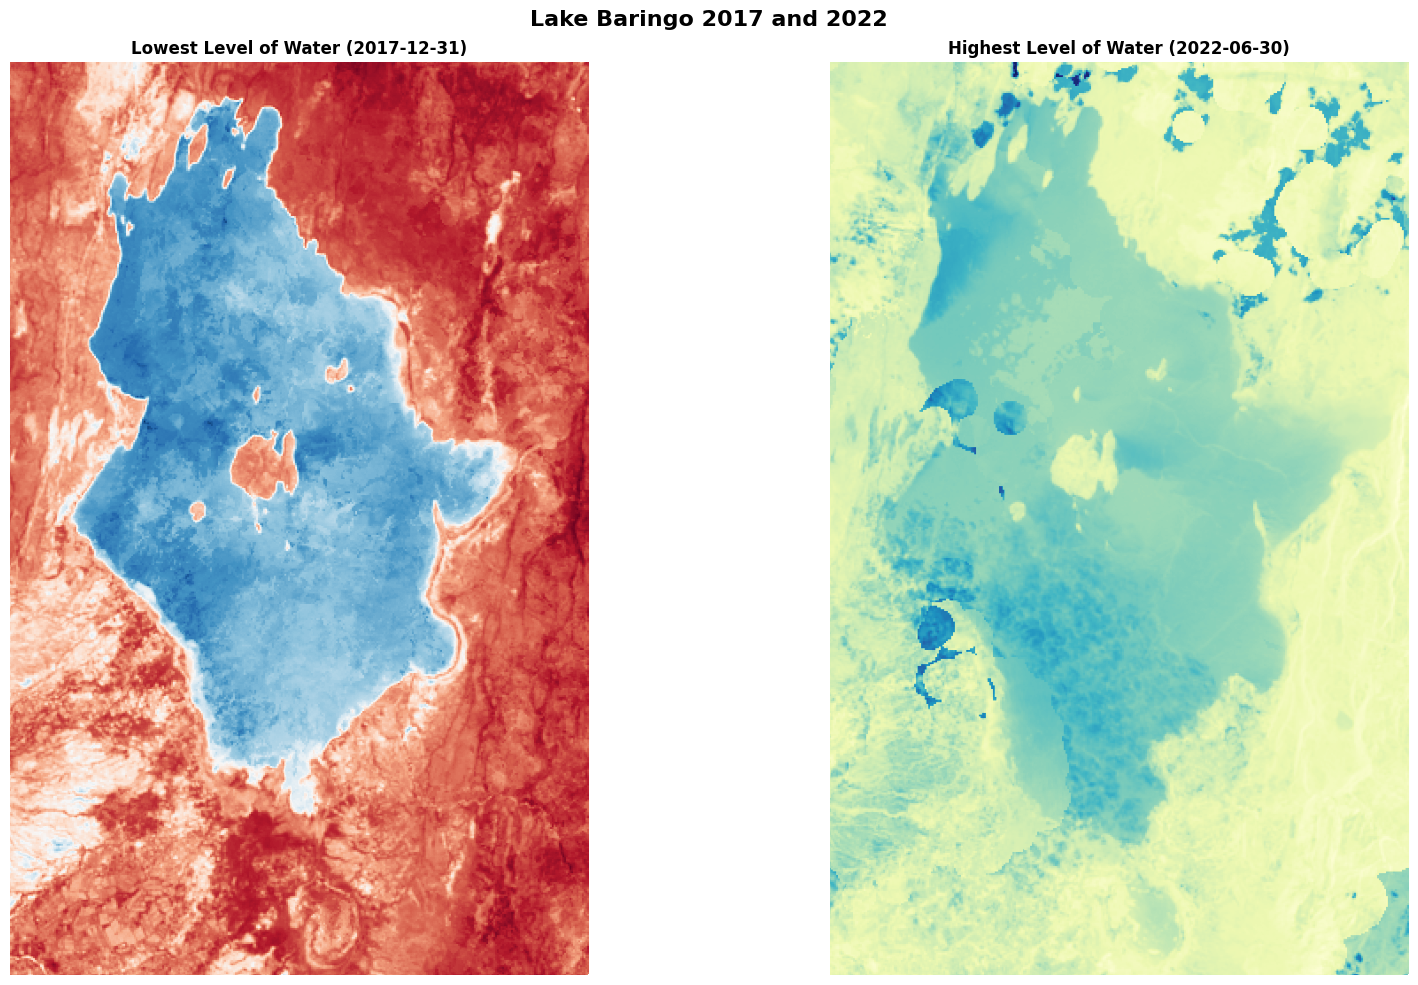

In [9]:
# Directory and image files
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'
start_image = 'Baringo2017-12-31.tif'
end_image = 'Baringo2022-06-30.tif'

# Function to display the image
def display_image(image_path, title, cmap, ax):
    with rasterio.open(image_path) as src:
        show(src, title=title, cmap=cmap, ax=ax)
        ax.axis('off')

# Create a figure and axes for the subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Display start image with RdBu colormap (red-blue diverging)
start_image_path = os.path.join(image_dir, start_image)
display_image(start_image_path, 'Lowest Level of Water (2017-12-31)', 'RdBu', ax=ax1)

# Display end image with YlGnBu colormap (yellow-green-blue diverging)
end_image_path = os.path.join(image_dir, end_image)
display_image(end_image_path, 'Highest Level of Water (2022-06-30)', 'YlGnBu', ax=ax2)

# Add a title to the entire figure
plt.suptitle('Lake Baringo 2017 and 2022', fontsize=16, fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


10. Change analysis of the highest and lowest water extent.

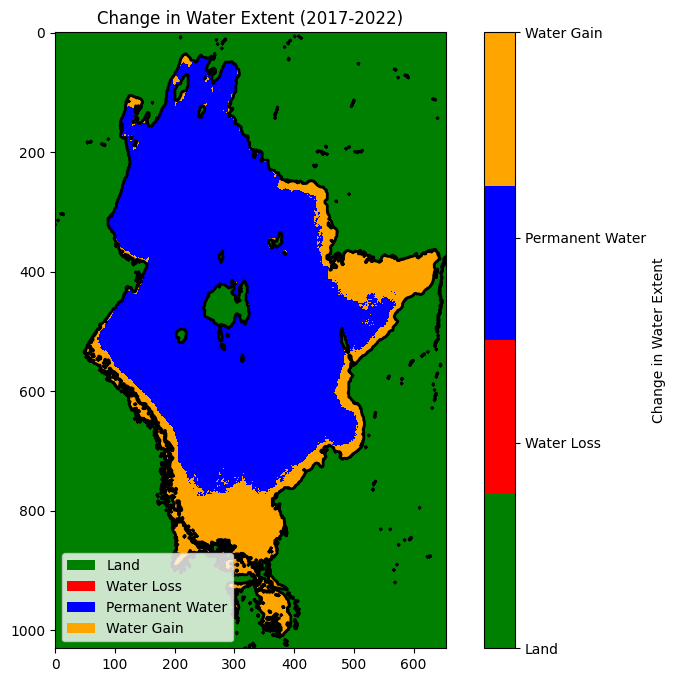

In [10]:
# Directory and image files
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'
start_image = 'Baringo2017-12-31.tif'
end_image = 'Baringo2022-06-30.tif'

# Function to calculate area from pixel counts
def calculate_area(pixel_count, pixel_size):
    return pixel_count * pixel_size

# Function to calculate MNDWI
def calculate_mndwi(green_band, swir_band):
    # Calculate MNDWI
    mndwi = (green_band.astype(float) - swir_band.astype(float)) / (green_band + swir_band + 1e-10)
    return mndwi

# Function to display the difference image with custom colors based on MNDWI
def display_difference_image(start_image_path, end_image_path):
    try:
        # Open the images
        with rasterio.open(start_image_path) as src_start, rasterio.open(end_image_path) as src_end:
            # Read the Green and SWIR bands
            green_start = src_start.read(2)  # Assuming Green is the 2nd band
            swir_start = src_start.read(6)   # Assuming SWIR is the 6th band
            green_end = src_end.read(2)      # Assuming Green is the 2nd band
            swir_end = src_end.read(6)       # Assuming SWIR is the 6th band
            
            # Calculate MNDWI for start and end images
            mndwi_start = calculate_mndwi(green_start, swir_start)
            mndwi_end = calculate_mndwi(green_end, swir_end)
            
            # Define thresholds for change detection
            mndwi_threshold = 0.1
            
            # Create masks for different categories
            water_loss_mask = (mndwi_start > mndwi_threshold) & (mndwi_end <= mndwi_threshold)
            water_gain_mask = (mndwi_start <= mndwi_threshold) & (mndwi_end > mndwi_threshold)
            permanent_water_mask = (mndwi_start > mndwi_threshold) & (mndwi_end > mndwi_threshold)
            land_mask = (mndwi_start <= mndwi_threshold) & (mndwi_end <= mndwi_threshold)
            
            # Create an empty array for visualization
            classified_image = np.zeros(mndwi_start.shape, dtype=int)
            classified_image[land_mask] = 0
            classified_image[water_loss_mask] = 1
            classified_image[permanent_water_mask] = 2
            classified_image[water_gain_mask] = 3
            
            # Set colors for different categories
            colors = ['green', 'red', 'blue', 'orange']  # Adjust colors here

            # Create colormap
            cmap = ListedColormap(colors)
            
            # Create a figure and axes for the subplot
            fig, ax = plt.subplots(figsize=(10, 8))

            # Display the classified image with colormap
            im = ax.imshow(classified_image, cmap=cmap, interpolation='none')
            
            # Add boundary of the lake
            contours = measure.find_contours(mndwi_end > mndwi_threshold, 0.5)
            for contour in contours:
                ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='black')

            # Add colorbar with category labels
            cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2, 3])
            cbar.ax.set_yticklabels(['Land', 'Water Loss', 'Permanent Water', 'Water Gain'])
            cbar.set_label('Change in Water Extent')

            # Add legend
            legend_elements = [
                Patch(facecolor='green', label='Land'),
                Patch(facecolor='red', label='Water Loss'),
                Patch(facecolor='blue', label='Permanent Water'),
                Patch(facecolor='orange', label='Water Gain')
            ]
            ax.legend(handles=legend_elements, loc='lower left')

            # Show plot
            plt.title('Change in Water Extent (2017-2022)')
            plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Construct full paths to the images
start_image_path = os.path.join(image_dir, start_image)
end_image_path = os.path.join(image_dir, end_image)

# Display the difference image using MNDWI
display_difference_image(start_image_path, end_image_path)


11. Plotting an interactive map. 

In [11]:
# Directory and image files
image_dir = '/home/eoafrica/Lake_Baringo/KU Hackathon'

# Dropdowns for selecting years
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
start_year_dropdown = Dropdown(options=years, description='Start Year:')
end_year_dropdown = Dropdown(options=years, description='End Year:')

# Output widget for displaying the difference image and map
output = Output()

# Function to calculate area from pixel counts
def calculate_area(pixel_count, pixel_size):
    return pixel_count * pixel_size

# Function to calculate MNDWI
def calculate_mndwi(green_band, swir_band):
    mndwi = (green_band.astype(float) - swir_band.astype(float)) / (green_band + swir_band + 1e-10)
    return mndwi

# Function to display the difference image with custom colors based on MNDWI
def display_difference_image(start_image_path, end_image_path):
    try:
        with rasterio.open(start_image_path) as src_start, rasterio.open(end_image_path) as src_end:
            green_start = src_start.read(2)  # Assuming Green is the 2nd band
            swir_start = src_start.read(6)   # Assuming SWIR is the 6th band
            green_end = src_end.read(2)      # Assuming Green is the 2nd band
            swir_end = src_end.read(6)       # Assuming SWIR is the 6th band
            
            mndwi_start = calculate_mndwi(green_start, swir_start)
            mndwi_end = calculate_mndwi(green_end, swir_end)
            
            mndwi_threshold = 0.1
            
            water_loss_mask = (mndwi_start > mndwi_threshold) & (mndwi_end <= mndwi_threshold)
            water_gain_mask = (mndwi_start <= mndwi_threshold) & (mndwi_end > mndwi_threshold)
            permanent_water_mask = (mndwi_start > mndwi_threshold) & (mndwi_end > mndwi_threshold)
            land_mask = (mndwi_start <= mndwi_threshold) & (mndwi_end <= mndwi_threshold)
            
            classified_image = np.zeros(mndwi_start.shape, dtype=int)
            classified_image[land_mask] = 0
            classified_image[water_loss_mask] = 1
            classified_image[permanent_water_mask] = 2
            classified_image[water_gain_mask] = 3
            
            # Adjusted colors with yellow for water to no water and red for water gain
            colors = ['green', 'yellow', 'lightblue', 'red']
            cmap = ListedColormap(colors)
            
            output.clear_output()
            with output:
                fig, ax = plt.subplots(figsize=(10, 8))
                im = ax.imshow(classified_image, cmap=cmap, interpolation='none')
                
                contours = measure.find_contours(mndwi_end > mndwi_threshold, 0.5)
                for contour in contours:
                    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='black')

                cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2, 3])
                cbar.ax.set_yticklabels(['Land', 'Water to No Water', 'Water to Water', 'Water Gain'])
                cbar.set_label('Change in Water Extent')

                legend_elements = [
                    Patch(facecolor='green', label='Land'),
                    Patch(facecolor='yellow', label='Water to No Water'),
                    Patch(facecolor='lightblue', label='Water to Water'),
                    Patch(facecolor='red', label='Water Gain')
                ]
                ax.legend(handles=legend_elements, loc='lower left')

                plt.title(f'Change in Water Extent: {os.path.basename(start_image_path)} to {os.path.basename(end_image_path)}')
                plt.show()

                # Display map with markers
                display_map(image_dir, start_year_dropdown.value, end_year_dropdown.value)

    except Exception as e:
        print(f"An error occurred: {e}")

# Function to display map with markers
def display_map(image_dir, start_year, end_year):
    try:
        m = Map(center=(0.6671, 36.0717), zoom=11)
        
        for year in range(int(start_year), int(end_year) + 1):
            image_file = f'Baringo{year}-06-30.tif'
            image_path = os.path.join(image_dir, image_file)
            with rasterio.open(image_path) as src:
                bounds = src.bounds
            center = ((bounds.bottom + bounds.top) / 2, (bounds.left + bounds.right) / 2)
            marker = Marker(location=center, draggable=False)
            m.add_layer(marker)

        m.add_control(FullScreenControl())
        
        with output:
            display(m)
    
    except Exception as e:
        print(f"An error occurred while displaying the map: {e}")

# Function to update display when dropdown values change
def update_display(change):
    start_year = start_year_dropdown.value
    end_year = end_year_dropdown.value
    start_image_path = os.path.join(image_dir, f'Baringo{start_year}-06-30.tif')
    end_image_path = os.path.join(image_dir, f'Baringo{end_year}-06-30.tif')
    display_difference_image(start_image_path, end_image_path)

# Observe changes in the dropdowns
start_year_dropdown.observe(update_display, names='value')
end_year_dropdown.observe(update_display, names='value')

# Display dropdowns and output
display(VBox([start_year_dropdown, end_year_dropdown, output]))